# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         23056950      1  regionprofile   
                                             277482448     1  regionprofile   
                                             342617063     1  regionprofile   
                                             362352209     1  regionprofile   
                                             1032065064    1  regionprofile   
                                             1491153857    1  regionprofile   
                                             1642830958    1  regionprofile   
                                             2104588869    1  regionprofile   
                                             2172300790    1  regionprofile   
                                             2456766213    1  regionprofile   
                                             2496855500    1  regionprofile   
                                             2565622787    1  regionprofile   
                                             2626279528    1  regionprofile   
                                             3043616485    1  regionprofile   
                                             3184293845    1  regionprofile   
                                             3446572744    1  regionprofile   
                                             3452477975    1  regionprofile   
                                             3526872179    1  regionprofile   
                                             3764152635    1  regionprofile   
                                             3925186993    1  regionprofile   
{'name': 'comm', 'type': 'function'}         23056950      3  regionprofile   
                                             277482448     3  regionprofile   
                                             342617063     3  regionprofile   
                                             362352209     3  regionprofile   
                                             1032065064    3  regionprofile   
                                             1491153857    3  regionprofile   
                                             1642830958    3  regionprofile   
                                             2104588869    3  regionprofile   
                                             2172300790    3  regionprofile   
                                             2456766213    3  regionprofile   
                                             2496855500    3  regionprofile   
                                             2565622787    3  regionprofile   
                                             2626279528    3  regionprofile   
                                             3043616485    3  regionprofile   
                                             3184293845    3  regionprofile   
                                             3446572744    3  regionprofile   
                                             3452477975    3  regionprofile   
                                             3526872179    3  regionprofile   
                                             3764152635    3  regionprofile   
                                             3925186993    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   23056950      4  regionprofile   
                                             277482448     4  regionprofile   
                                             342617063     4  regionprofile   
                                             362352209     4  regionprofile   
                                             1032065064    4  regionprofile   
                                             1491153857    4  regionprofile   
                                             1642830958    4  regionprofile   
                                             2104588869    4  regionprofile   
                                             2172300790    4  regionprofile   
                            

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
23056950,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224021,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,ReverseSorted,512,512,4,Handwritten
277482448,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223876,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,64,1024,4,Handwritten
342617063,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224101,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 1048576]",g,BitonicSort,CUDA,int,4,1048576,ReverseSorted,512,2048,4,Handwritten
362352209,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224419,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 1, 4194304]",g,BitonicSort,CUDA,int,4,4194304,ReverseSorted,1,4194304,4,Handwritten
1032065064,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223897,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,256,256,4,Handwritten
1491153857,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224053,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 1048576]",g,BitonicSort,CUDA,int,4,1048576,ReverseSorted,64,16384,4,Handwritten
1642830958,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223985,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,ReverseSorted,128,2048,4,Handwritten
2104588869,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224445,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 4194304]",g,BitonicSort,CUDA,int,4,4194304,ReverseSorted,512,8192,4,Handwritten
2172300790,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224001,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,ReverseSorted,256,1024,4,Handwritten


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy_1
├─ 1.000 comp
│  └─ 1.000 comp_large
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b24c2f076a0>, 262144: <thicket.thicket.Thicket object at 0x2b24c2de6a60>, 1048576: <thicket.thicket.Thicket object at 0x2b24c2e1cee0>, 4194304: <thicket.thicket.Thicket object at 0x2b24c2e0acd0>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2b24c2f076a0>, 262144: <thicket.thicket.Thicket object at 0x2b24c2de6a60>, 1048576: <thicket.thicket.Thicket object at 0x2b24c2e1cee0>, 4194304: <thicket.thicket.Thicket object at 0x2b24c2e0acd0>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2b24c2f076a0>, <thicket.thicket.Thicket object at 0x2b24c2de6a60>, <thicket.thicket.Thicket object at 0x2b24c2e1cee0>, <thicket.thicket.Thicket object at 0x2b24c2e0acd0>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [20]:
ctk.dataframe

,name,num_threads,65536,262144,1048576,4194304
,,,Total time,Total time,Total time,Total time
0,main,1,0.342601,0.393233,0.556168,1.233387
1,main,64,0.314719,0.331273,0.341179,0.382881
2,main,128,0.318824,0.328239,0.339807,0.365229
3,main,256,0.319632,0.326909,0.337741,0.362791
4,main,512,0.319725,0.331086,0.331549,0.354367
5,comm,1,0.000160,0.000313,0.001059,0.003739
6,comm,64,0.000160,0.000313,0.001061,0.003729
7,comm,128,0.000143,0.000315,0.001068,0.003722
8,comm,256,0.000144,0.000316,0.001061,0.003713


Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [55]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Avg time/rank"), (262144, "Avg time/rank"), (1048576, "Avg time/rank"), (4194304, "Avg time/rank")], axis=1)

In [21]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [22]:
ctk.dataframe

65536     262144    1048576    4194304
                         Total time Total time Total time Total time
name         num_threads                                            
main         1             0.342601   0.393233   0.556168   1.233387
             64            0.314719   0.331273   0.341179   0.382881
             128           0.318824   0.328239   0.339807   0.365229
             256           0.319632   0.326909   0.337741   0.362791
             512           0.319725   0.331086   0.331549   0.354367
comm         1             0.000160   0.000313   0.001059   0.003739
             64            0.000160   0.000313   0.001061   0.003729
             128           0.000143   0.000315   0.001068   0.003722
             256           0.000144   0.000316   0.001061   0.003713
             512           0.000152   0.000317   0.001066   0.003711
comm_large   1             0.000127   0.000280   0.001027   0.003707
             64            0.000128   0.000281   0.001030   0.003699
             128           0.000111   0.000283   0.001036   0.003690
             256           0.000112   0.000285   0.001028   0.003682
             512           0.000121   0.000285   0.001035   0.003679
cudaMemcpy_1 1             0.000112   0.000264   0.001009   0.003688
             64            0.000113   0.000264   0.001012   0.003680
             128           0.000097   0.000267   0.001018   0.003671
             256           0.000098   0.000268   0.001009   0.003663
             512           0.000106   0.000267   0.001017   0.003660
comp         1             0.000449   0.000499   0.000610   0.000721
             64            0.000455   0.000525   0.000636   0.000692
             128           0.000418   0.000529   0.000592   0.000726
             256           0.000418   0.000507   0.000620   0.000701
             512           0.000414   0.000505   0.000615   0.000749
comp_large   1             0.000440   0.000490   0.000600   0.000711
             64            0.000446   0.000515   0.000626   0.000681
             128           0.000409   0.000519   0.000581   0.000716
             256           0.000410   0.000497   0.000610   0.000692
             512           0.000405   0.000495   0.000606   0.000738
data_init    1             0.000283   0.001058   0.003962   0.015042
             64            0.000280   0.001066   0.003912   0.014237
             128           0.000277   0.001076   0.003901   0.014945
             256           0.000281   0.001060   0.003905   0.014317
             512           0.000282   0.001063   0.003904   0.014791

In [23]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [86]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
df_1 = ctk.dataframe
# df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

65536     262144    1048576    4194304
                         Total time Total time Total time Total time
name         num_threads                                            
main         1             0.407951   0.366090   0.575533   1.280906
             64            0.495571   0.332067   0.457133   0.659693
             128           0.465160   0.328475   0.343786   0.689057
             256           0.604006   0.531673   0.235333   0.664524
             512           0.609716   0.608071   0.342254   0.666225
comm         1             0.000183   0.000320   0.001060   0.003719
             64            0.000164   0.000316   0.001449   0.003756
             128           0.000186   0.000320   0.001053   0.003781
             256           0.000151   0.000306   0.001089   0.003702
             512           0.000134   0.000328   0.001056   0.003703
comm_large   1             0.000131   0.000281   0.001027   0.003685
             64            0.000130   0.000285   0.001399   0.003730
             128           0.000153   0.000286   0.001019   0.003750
             256           0.000118   0.000278   0.001055   0.003673
             512           0.000108   0.000298   0.001025   0.003663
cudaMemcpy_1 1             0.000116   0.000264   0.001008   0.003667
             64            0.000115   0.000267   0.001365   0.003712
             128           0.000137   0.000269   0.001001   0.003733
             256           0.000103   0.000261   0.001035   0.003653
             512           0.000094   0.000282   0.001007   0.003646
comp         1             0.000631   0.000503   0.000625   0.000672
             64            0.000451   0.000527   0.000940   0.000713
             128           0.000440   0.000491   0.000589   0.000693
             256           0.000483   0.000516   0.000709   0.000705
             512           0.000389   0.000443   0.000600   0.000640
comp_large   1             0.000615   0.000493   0.000615   0.000662
             64            0.000441   0.000517   0.000920   0.000702
             128           0.000430   0.000480   0.000579   0.000682
             256           0.000473   0.000506   0.000697   0.000694
             512           0.000380   0.000434   0.000590   0.000630
data_init    1             0.000882   0.003282   0.012031   0.049823
             64            0.000820   0.003216   0.013201   0.048727
             128           0.000865   0.003232   0.012039   0.048626
             256           0.000824   0.003254   0.011874   0.048719
             512           0.000823   0.003266   0.012627   0.049538

In [24]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

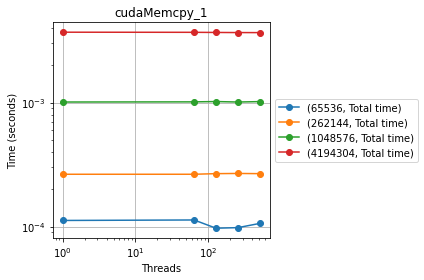

<Figure size 1440x1440 with 0 Axes>

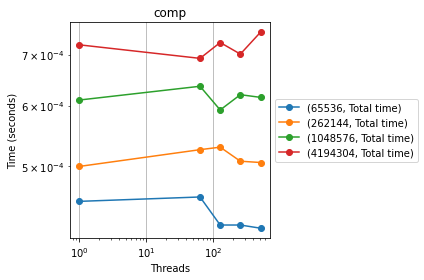

<Figure size 1440x1440 with 0 Axes>

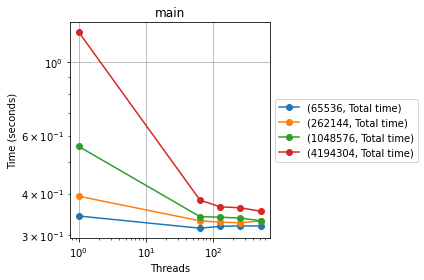

<Figure size 1440x1440 with 0 Axes>

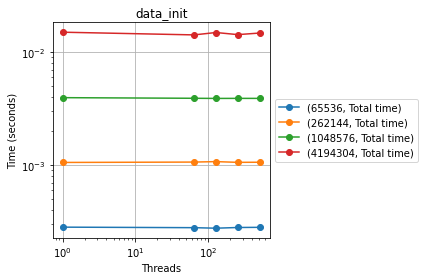

<Figure size 1440x1440 with 0 Axes>

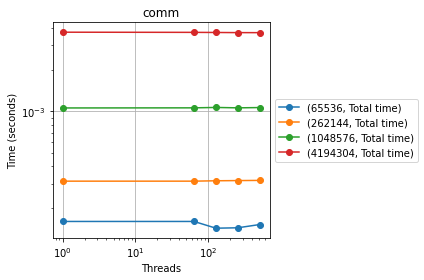

<Figure size 1440x1440 with 0 Axes>

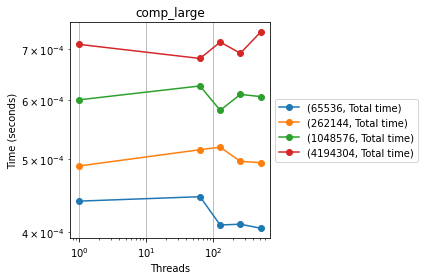

<Figure size 1440x1440 with 0 Axes>

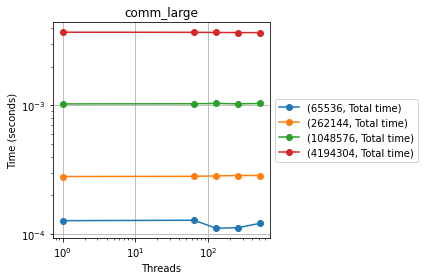

In [25]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [26]:
ctk.dataframe

65536     262144    1048576    4194304
                         Total time Total time Total time Total time
name         num_threads                                            
main         1             0.342601   0.393233   0.556168   1.233387
             64            0.314719   0.331273   0.341179   0.382881
             128           0.318824   0.328239   0.339807   0.365229
             256           0.319632   0.326909   0.337741   0.362791
             512           0.319725   0.331086   0.331549   0.354367
comm         1             0.000160   0.000313   0.001059   0.003739
             64            0.000160   0.000313   0.001061   0.003729
             128           0.000143   0.000315   0.001068   0.003722
             256           0.000144   0.000316   0.001061   0.003713
             512           0.000152   0.000317   0.001066   0.003711
comm_large   1             0.000127   0.000280   0.001027   0.003707
             64            0.000128   0.000281   0.001030   0.003699
             128           0.000111   0.000283   0.001036   0.003690
             256           0.000112   0.000285   0.001028   0.003682
             512           0.000121   0.000285   0.001035   0.003679
cudaMemcpy_1 1             0.000112   0.000264   0.001009   0.003688
             64            0.000113   0.000264   0.001012   0.003680
             128           0.000097   0.000267   0.001018   0.003671
             256           0.000098   0.000268   0.001009   0.003663
             512           0.000106   0.000267   0.001017   0.003660
comp         1             0.000449   0.000499   0.000610   0.000721
             64            0.000455   0.000525   0.000636   0.000692
             128           0.000418   0.000529   0.000592   0.000726
             256           0.000418   0.000507   0.000620   0.000701
             512           0.000414   0.000505   0.000615   0.000749
comp_large   1             0.000440   0.000490   0.000600   0.000711
             64            0.000446   0.000515   0.000626   0.000681
             128           0.000409   0.000519   0.000581   0.000716
             256           0.000410   0.000497   0.000610   0.000692
             512           0.000405   0.000495   0.000606   0.000738
data_init    1             0.000283   0.001058   0.003962   0.015042
             64            0.000280   0.001066   0.003912   0.014237
             128           0.000277   0.001076   0.003901   0.014945
             256           0.000281   0.001060   0.003905   0.014317
             512           0.000282   0.001063   0.003904   0.014791

## SPEEDUP


In [27]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [28]:
speedup_df

65536     262144    1048576    4194304
                         Total time Total time Total time Total time
name         num_threads                                            
main         1             1.000000   1.000000   1.000000   1.000000
             64            1.088593   1.187036   1.630136   3.221332
             128           1.074577   1.198008   1.636717   3.377024
             256           1.071861   1.202882   1.646729   3.399718
             512           1.071549   1.187707   1.677484   3.480536
comm         1             1.000000   1.000000   1.000000   1.000000
             64            1.000000   1.000000   0.998115   1.002682
             128           1.118881   0.993651   0.991573   1.004567
             256           1.111111   0.990506   0.998115   1.007002
             512           1.052632   0.987382   0.993433   1.007545
comm_large   1             1.000000   1.000000   1.000000   1.000000
             64            0.992188   0.996441   0.997087   1.002163
             128           1.144144   0.989399   0.991313   1.004607
             256           1.133929   0.982456   0.999027   1.006790
             512           1.049587   0.982456   0.992271   1.007611
cudaMemcpy_1 1             1.000000   1.000000   1.000000   1.000000
             64            0.991150   1.000000   0.997036   1.002174
             128           1.154639   0.988764   0.991159   1.004631
             256           1.142857   0.985075   1.000000   1.006825
             512           1.056604   0.988764   0.992134   1.007650
comp         1             1.000000   1.000000   1.000000   1.000000
             64            0.986813   0.950476   0.959119   1.041908
             128           1.074163   0.943289   1.030405   0.993113
             256           1.074163   0.984221   0.983871   1.028531
             512           1.084541   0.988119   0.991870   0.962617
comp_large   1             1.000000   1.000000   1.000000   1.000000
             64            0.986547   0.951456   0.958466   1.044053
             128           1.075795   0.944123   1.032702   0.993017
             256           1.073171   0.985915   0.983607   1.027457
             512           1.086420   0.989899   0.990099   0.963415
data_init    1             1.000000   1.000000   1.000000   1.000000
             64            1.010714   0.992495   1.012781   1.056543
             128           1.021661   0.983271   1.015637   1.006490
             256           1.007117   0.998113   1.014597   1.050639
             512           1.003546   0.995296   1.014857   1.016970

<Figure size 1440x1440 with 0 Axes>

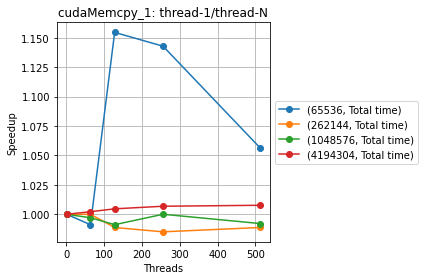

<Figure size 1440x1440 with 0 Axes>

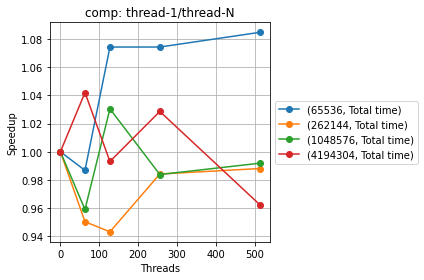

<Figure size 1440x1440 with 0 Axes>

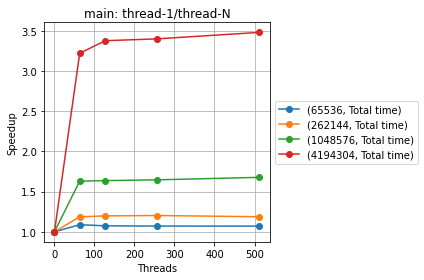

<Figure size 1440x1440 with 0 Axes>

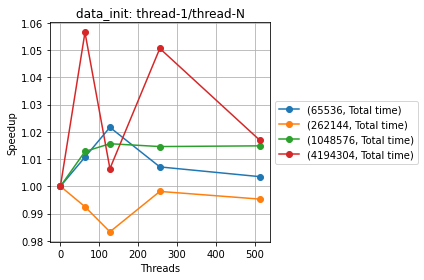

<Figure size 1440x1440 with 0 Axes>

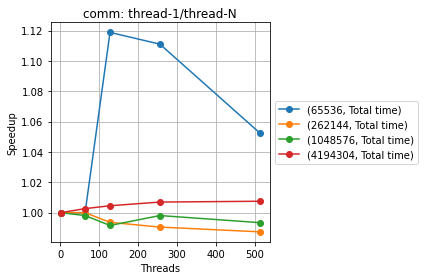

<Figure size 1440x1440 with 0 Axes>

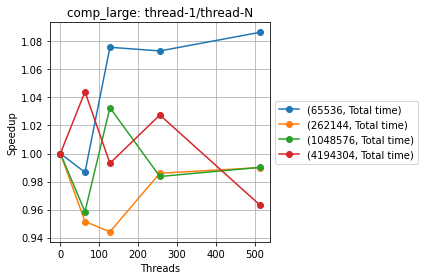

<Figure size 1440x1440 with 0 Axes>

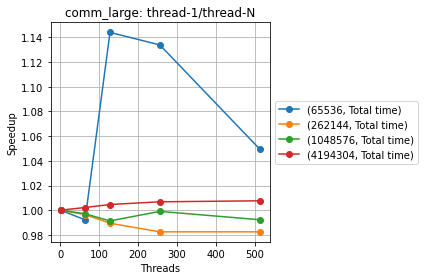

In [29]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## STRONG SCALING

In [94]:
# increase the nummber of threads but dont increase the array size

In [30]:
beans = ctk.dataframe
beans = beans.reset_index().drop([(262144), (1048576), (4194304)], axis=1)
beans = beans.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

beans


/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


65536
                         Total time
name         num_threads           
main         1             0.342601
             64            0.314719
             128           0.318824
             256           0.319632
             512           0.319725
comm         1             0.000160
             64            0.000160
             128           0.000143
             256           0.000144
             512           0.000152
comm_large   1             0.000127
             64            0.000128
             128           0.000111
             256           0.000112
             512           0.000121
cudaMemcpy_1 1             0.000112
             64            0.000113
             128           0.000097
             256           0.000098
             512           0.000106
comp         1             0.000449
             64            0.000455
             128           0.000418
             256           0.000418
             512           0.000414
comp_large   1             0.000440
             64            0.000446
             128           0.000409
             256           0.000410
             512           0.000405
data_init    1             0.000283
             64            0.000280
             128           0.000277
             256           0.000281
             512           0.000282

<Figure size 1440x1440 with 0 Axes>

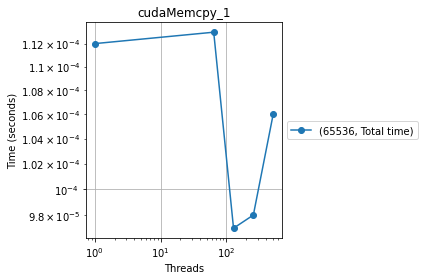

<Figure size 1440x1440 with 0 Axes>

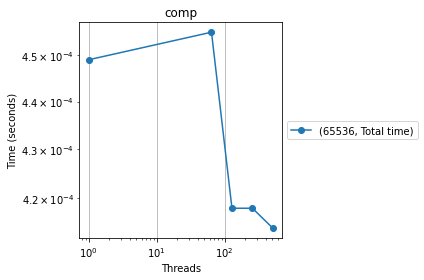

<Figure size 1440x1440 with 0 Axes>

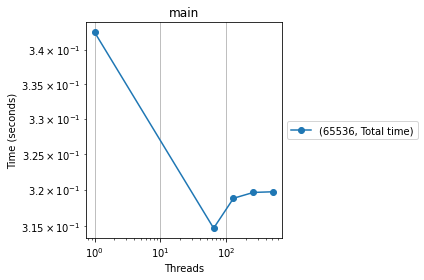

<Figure size 1440x1440 with 0 Axes>

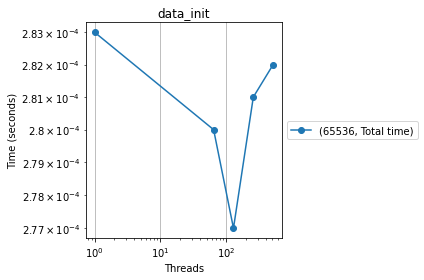

<Figure size 1440x1440 with 0 Axes>

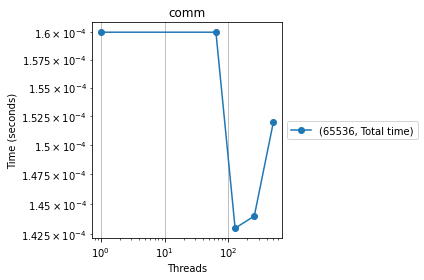

<Figure size 1440x1440 with 0 Axes>

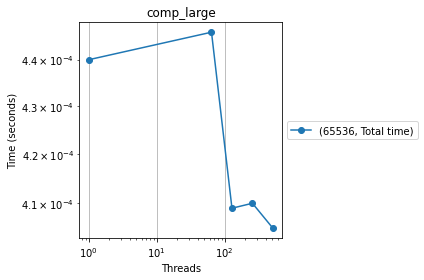

<Figure size 1440x1440 with 0 Axes>

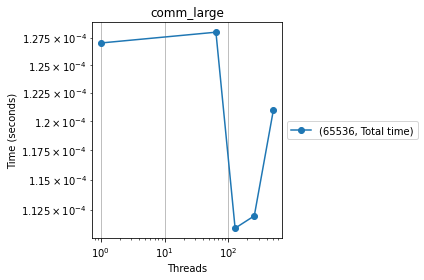

In [31]:
for name in function_names:
    plot_pandas(
        df=beans.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [14]:
df = ctk.dataframe

In [15]:
df.shape

(28, 25)

In [17]:
df.to_csv('rawData.csv', index=False)

In [99]:
df.columns

MultiIndex([(  65536,           'nid'),
            (  65536,  'spot.channel'),
            (  65536, 'Min time/rank'),
            (  65536, 'Max time/rank'),
            (  65536, 'Avg time/rank'),
            (  65536,    'Total time'),
            ( 262144,           'nid'),
            ( 262144,  'spot.channel'),
            ( 262144, 'Min time/rank'),
            ( 262144, 'Max time/rank'),
            ( 262144, 'Avg time/rank'),
            ( 262144,    'Total time'),
            (1048576,           'nid'),
            (1048576,  'spot.channel'),
            (1048576, 'Min time/rank'),
            (1048576, 'Max time/rank'),
            (1048576, 'Avg time/rank'),
            (1048576,    'Total time'),
            (4194304,           'nid'),
            (4194304,  'spot.channel'),
            (4194304, 'Min time/rank'),
            (4194304, 'Max time/rank'),
            (4194304, 'Avg time/rank'),
            (4194304,    'Total time'),
            ( 'name',              '')],

In [102]:
# df1 = df[['65536','262144','1048576','4194304']]
# df1

input_sizes = df.columns.levels[0]
input_sizes

Index([65536, 262144, 1048576, 4194304, 'name'], dtype='object')

In [106]:
# Now, create a dictionary to hold your DataFrames
dfs = {}

# Loop through each input size and create a new DataFrame for each
for input_size in input_sizes:
    if input_size != 'name':  # We will deal with the 'name' column separately
        # Select columns for the current input size
        columns_to_select = [col for col in df.columns if col[0] == input_size]
        # Create a new DataFrame with these columns
        dfs[input_size] = df[columns_to_select].copy()

# The 'name' column seems to be a separate category that doesn't fit with the input sizes
# We will add it to each DataFrame separately
for input_size_df in dfs.values():
    input_size_df[('name', '')] = df[('name', '')]

# Now, dfs is a dictionary with input sizes as keys and the corresponding DataFrames as values
# For example, to access the DataFrame for input size 65536:
df_65536 = dfs[65536]
df_262144 = dfs[262144]
df_1048576 = dfs[1048576]
df_4194304 = dfs[4194304]

In [104]:
df_65536

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         64               0.495571   
                                             128              0.465160   
                                             256              0.604006   
                                             512              0.609716   
{'name': 'comm', 'type': 'function'}         64               0.000164   
                                             128              0.000186   
                                             256              0.000151   
                                             512              0.000134   
{'name': 'comm_large', 'type': 'function'}   64               0.000130   
                                             128              0.000153   
                                             256              0.000118   
                                             512              0.000108   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               0.000115   
                                             128              0.000137   
                                             256              0.000103   
                                             512              0.000094   
{'name': 'comp', 'type': 'function'}         64               0.000451   
                                             128              0.0

In [107]:
df_262144

262144  \
                                                            nid   
node                                         num_threads          
{'name': 'main', 'type': 'function'}         64               1   
                                             128              1   
                                             256              1   
                                             512              1   
{'name': 'comm', 'type': 'function'}         64               3   
                                             128              3   
                                             256              3   
                                             512              3   
{'name': 'comm_large', 'type': 'function'}   64               4   
                                             128              4   
                                             256              4   
                                             512              4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               5   
                                             128              5   
                                             256              5   
                                             512              5   
{'name': 'comp', 'type': 'function'}         64               6   
                                             128              6   
                                             256              6   
                                             512              6   
{'name': 'comp_large', 'type': 'function'}   64               7   
                                             128              7   
                                             256              7   
                                             512              7   
{'name': 'data_init', 'type': 'function'}    64               2   
                                             128              2   
                                             256              2   
                                             512              2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                             

In [108]:
df_1048576

1048576  \
                                                             nid   
node                                         num_threads           
{'name': 'main', 'type': 'function'}         64                1   
                                             128               1   
                                             256               1   
                                             512               1   
{'name': 'comm', 'type': 'function'}         64                3   
                                             128               3   
                                             256               3   
                                             512               3   
{'name': 'comm_large', 'type': 'function'}   64                4   
                                             128               4   
                                             256               4   
                                             512               4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                5   
                                             128               5   
                                             256               5   
                                             512               5   
{'name': 'comp', 'type': 'function'}         64                6   
                                             128               6   
                                             256               6   
                                             512               6   
{'name': 'comp_large', 'type': 'function'}   64                7   
                                             128               7   
                                             256               7   
                                             512               7   
{'name': 'data_init', 'type': 'function'}    64                2   
                                             128               2   
                                             256               2   
                                             512               2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile  

In [109]:
df_4194304

4194304  \
                                                             nid   
node                                         num_threads           
{'name': 'main', 'type': 'function'}         64                1   
                                             128               1   
                                             256               1   
                                             512               1   
{'name': 'comm', 'type': 'function'}         64                3   
                                             128               3   
                                             256               3   
                                             512               3   
{'name': 'comm_large', 'type': 'function'}   64                4   
                                             128               4   
                                             256               4   
                                             512               4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                5   
                                             128               5   
                                             256               5   
                                             512               5   
{'name': 'comp', 'type': 'function'}         64                6   
                                             128               6   
                                             256               6   
                                             512               6   
{'name': 'comp_large', 'type': 'function'}   64                7   
                                             128               7   
                                             256               7   
                                             512               7   
{'name': 'data_init', 'type': 'function'}    64                2   
                                             128               2   
                                             256               2   
                                             512               2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile  

In [114]:
# # Define common variables
# function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [118]:
df_65536.columns

MultiIndex([( 65536,           'nid'),
            ( 65536,  'spot.channel'),
            ( 65536, 'Min time/rank'),
            ( 65536, 'Max time/rank'),
            ( 65536, 'Avg time/rank'),
            ( 65536,    'Total time'),
            ('name',              '')],
           )

In [134]:
print(df_65536.columns.levels)  # This will show all levels in the MultiIndex
print(df_65536.columns.names)  

[[65536, 262144, 1048576, 4194304, 'name'], ['Avg time/rank', 'Max time/rank', 'Min time/rank', 'Total time', 'name', 'nid', 'spot.channel', '']]
[None, None]


In [139]:
# print(df_65536.index.unique(1))

Int64Index([64, 128, 256, 512], dtype='int64', name='num_threads')


In [141]:
# Filtering rows where the second level of the MultiIndex is 'name' and its corresponding value is 'main'
filtered_df_65536 = df_65536[df_65536.index.get_level_values(1) == 'name']
filtered_df_65536.shape

(0, 7)

In [144]:
df1_fin = df_65536.head(4)
df1_fin

65536                 \
                                                   nid   spot.channel   
node                                 num_threads                        
{'name': 'main', 'type': 'function'} 64              1  regionprofile   
                                     128             1  regionprofile   
                                     256             1  regionprofile   
                                     512             1  regionprofile   

                                                                              \
                                                 Min time/rank Max time/rank   
node                                 num_threads                               
{'name': 'main', 'type': 'function'} 64               0.495571      0.495571   
                                     128              0.465160      0.465160   
                                     256              0.604006      0.604006   
                                     512              0.609716      0.609716   

                                                                           \
                                                 Avg time/rank Total time   
node                                 num_threads                            
{'name': 'main', 'type': 'function'} 64               0.495571   0.495571   
                                     128              0.465160   0.465160   
                                     256              0.604006   0.604006   
                                     512              0.609716   0.609716   

                                                  name  
                                                        
node                                 num_threads        
{'name': 'main', 'type': 'function'} 64           main  
                                     128          main  
                                     256          main  
                                     512          main

In [146]:
df1_fin.columns

MultiIndex([( 65536,           'nid'),
            ( 65536,  'spot.channel'),
            ( 65536, 'Min time/rank'),
            ( 65536, 'Max time/rank'),
            ( 65536, 'Avg time/rank'),
            ( 65536,    'Total time'),
            ('name',              '')],
           )

In [145]:
plt.scatter(df1_fin['num_threads'], df1_fin['Avg time/rank'])
plt.xlabel('Number of Threads')
plt.ylabel('Average Time per Rank')
plt.title('Average Time per Rank vs. Number of Threads')
plt.show()

KeyError: 'num_threads'

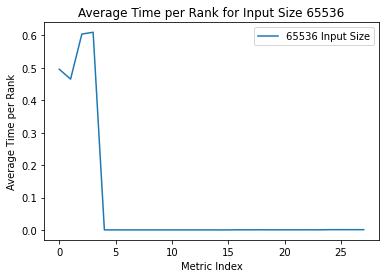

In [125]:
import matplotlib.pyplot as plt

avg_time_data = df_65536.xs('Avg time/rank', level=1, axis=1)

# plt.plot(range(len(avg_time_data)), avg_time_data.iloc[:, 0], label='65536 Input Size')
plt.title('Average Time per Rank for Input Size 65536')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

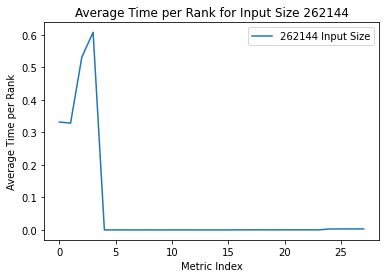

In [128]:
avg_time_data_262144 = df_262144.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_262144)), avg_time_data_262144.iloc[:, 0], label='262144 Input Size')
plt.title('Average Time per Rank for Input Size 262144')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

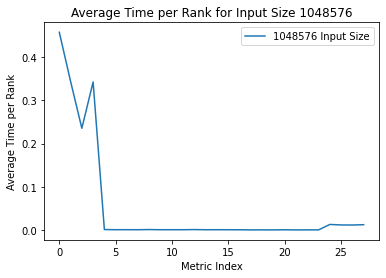

In [129]:
avg_time_data_1048576 = df_1048576.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_1048576)), avg_time_data_1048576.iloc[:, 0], label='1048576 Input Size')
plt.title('Average Time per Rank for Input Size 1048576')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

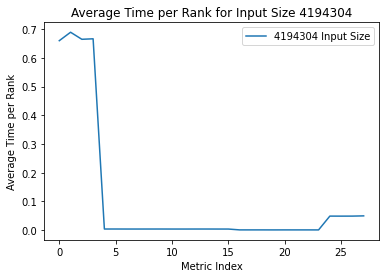

In [130]:
avg_time_data_4194304 = df_4194304.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_4194304)), avg_time_data_4194304.iloc[:, 0], label='4194304 Input Size')
plt.title('Average Time per Rank for Input Size 4194304')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [111]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [12]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [13]:
ctk.dataframe.loc["main"]

,128,1024,4096
threads,,,
1,0.000270,0.000257,0.000367
2,0.000247,0.000284,0.000406
4,0.000256,0.000260,0.000374
8,0.000241,0.000278,0.000357
16,0.000262,0.000284,0.000356
32,0.000264,0.000264,0.000373
64,0.000256,0.000284,0.000453
96,0.000253,0.000305,0.000417
128,0.000287,0.000284,0.000414


In [112]:
for name in function_names:
    plot_pandas(
        df=df_65536,
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

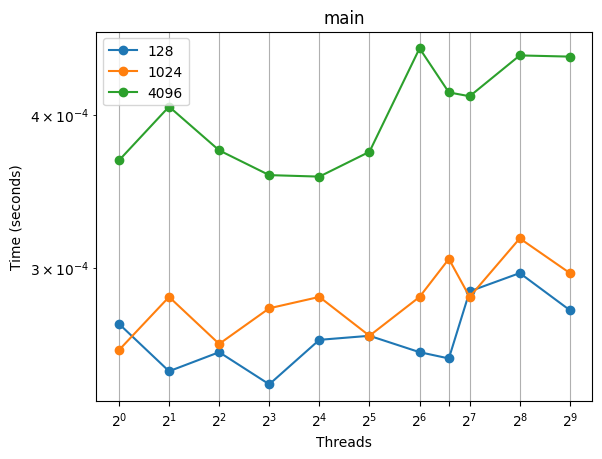

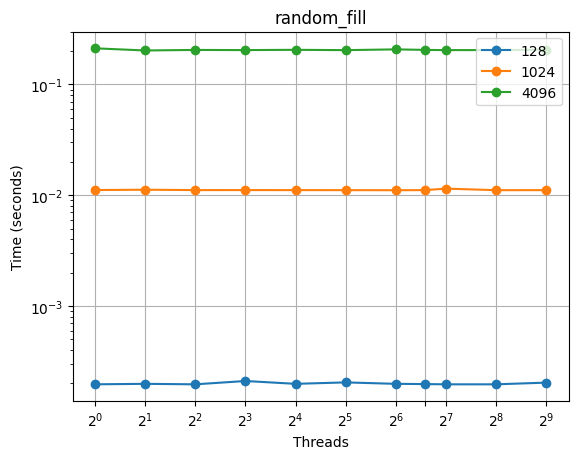

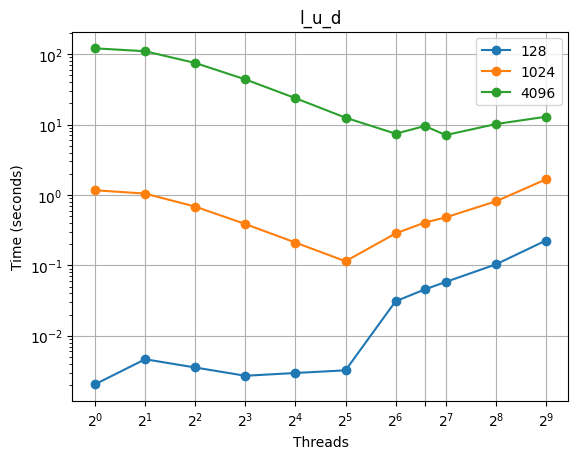

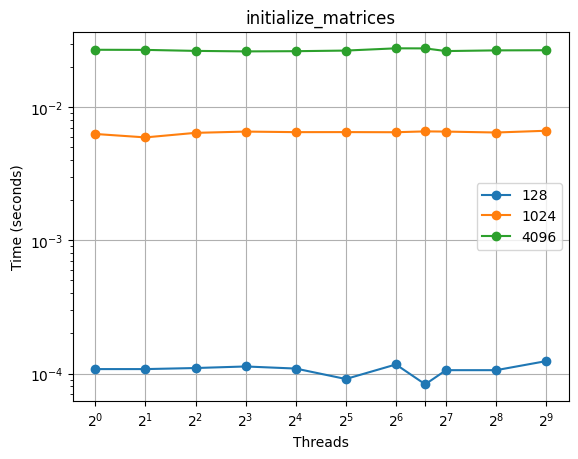

In [15]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

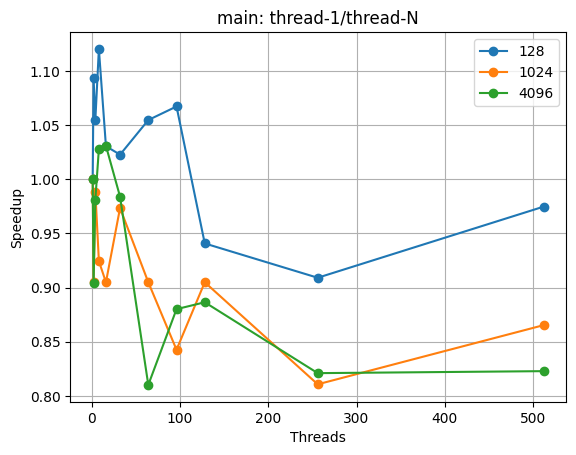

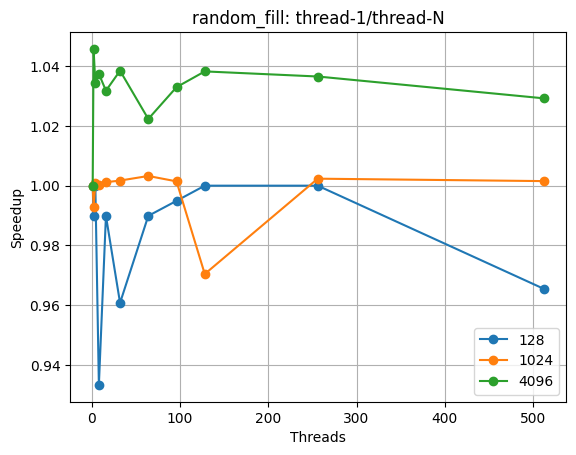

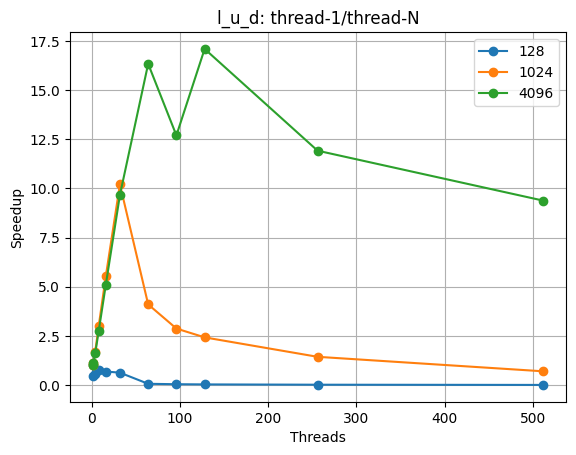

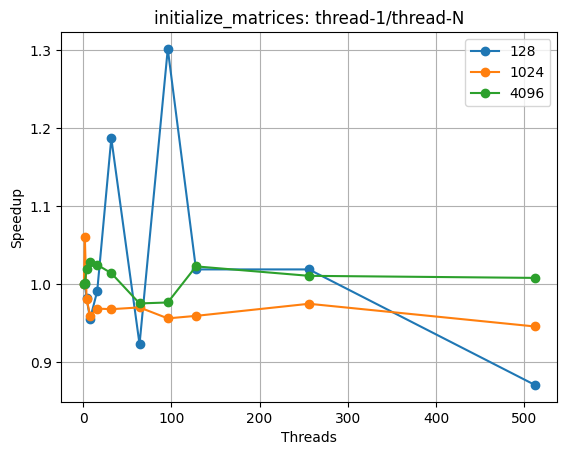

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )